In [348]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
df = pd.read_csv("/content/Customer-Churn-Records.csv")

## 📥 1. Análisis Exploratorio de Datos (EDA)

###Pregunta teórica:

* ¿Que pasos seguirıas para realizar un analisis exploratorio de los datos antes de construir un modelo de
Machine Learning? Explica cada paso y menciona las herramientas que utilizarıas.

####Respuesta:
* Los pasos que seguiria son:
1. Identificar y comprender el conjunto de datos. Esto lo haria por medio de funciones como head(), shape, info() y describe()
2. Realizaria la limpieza de datos identificando primero valores faltantes y outliers para luego corregirlos. Esto lo haria por medio de funciones como isnull(), fillna() y dropna()
3. Realizaria el análisis de mis variables y observaria como se relacionan con mi variable objetivo. Esto lo realizaria usando heatmap() y corr()
4. Prepararia los datos para mi modelo codificando las variables categoricas y dividiendo mi dataset


###Preguntas prácticas

1. ¿Cual es el promedio de la puntuacion de credito (CreditScore) de los clientes?
2. ¿Cual es el balance promedio (Balance) de los clientes que abandonaron el banco (Exited = 1)?
3. ¿Cual es la edad promedio (Age) de los clientes activos (IsActiveMember = 1)?

####Respuestas:
1. El promedio de la puntuación de crédito es 650.52
2. El balance promedio de los clientes que abandonaron el banco es 91109.47
3. La edad promedio de los clientes activos es 39.79

In [349]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [350]:
df.shape

(10000, 18)

In [351]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [352]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [353]:
promedio_credit_score = df['CreditScore'].mean()
promedio_credit_score

np.float64(650.5288)

In [354]:
clientes_que_abandonaron = df[df['Exited'] == 1]
balance_promedio = clientes_que_abandonaron['Balance'].mean()
balance_promedio

np.float64(91109.47600588812)

In [355]:
clientes_activos= df[df['IsActiveMember'] == 1]
edad_promedio = clientes_activos['Age'].mean()
edad_promedio

np.float64(39.7914967967385)

## 🛠️ 2. Preprocesamiento de datos y definición de variables

###Pregunta teórica:

* Imagina que uno de los datos contiene valores faltantes o atıpicos (outliers). ¿Que tecnicas utilizarıas
para tratar con estos problemas en el conjunto de datos de la tabla? Justifica tu respuesta.

####Respuesta:

* Cuando hay valores faltantes o atípicos primero se identifica cuántos y dónde están. Si hay pocos valores faltantes, se pueden eliminar las filas o columnas afectadas; pero si son muchos, se podrian reemplazar con la media. Los outliers se pueden identificar usando el rango intercuartílico y luego se decidice si se eliminan o se agrupan, dependiendo de si son errores o datos extremos. Todo esto se hace para evitar que el modelo se entrene con información incorrecta o sesgada.



###Realiza los siguientes pasos de preprocesamiento:
* Convierte la variable Gender en una
variable binaria (0: Female, 1: Male).
* Convierte la variable Geography en variables dummy (Francia = 1, Espa˜na = 0, etc.).
* Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente.
* Escala las variables num´ericas (como CreditScore, Age, Balance, EstimatedSalary) utilizando
Min-Max o StandardScaler.

In [356]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [357]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [358]:
df['Gender'] = df['Gender'].map({'Female': 0, 'Male': 1})
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,1,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,1,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,0,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,1,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [359]:
df_clean = pd.get_dummies(df, columns=["Geography"])
df_clean.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,Geography_France,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464,True,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456,False,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377,True,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350,True,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425,False,False,True


In [360]:
df_clean.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0


In [361]:
numerical_features = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']
scaler = MinMaxScaler()
df_clean[numerical_features] = scaler.fit_transform(df_clean[numerical_features])

In [362]:
df_clean[numerical_features].head()

,CreditScore,Age,Balance,EstimatedSalary
0,0.538,0.324324,0.000000,0.506735
1,0.516,0.310811,0.334031,0.562709
2,0.304,0.324324,0.636357,0.569654
3,0.698,0.283784,0.000000,0.469120
4,1.000,0.337838,0.500246,0.395400


## 3. Modelos de Clasificación

###Pregunta teórica:

* En este caso, el objetivo es predecir si un cliente abandonara el banco (Exited) basandonos en sus
caracterısticas. ¿Que tipo de modelo de clasificacion usarıas y por que? Discute las ventajas y desventajas
de este modelo.

####Respuesta:

* Para predecir si un cliente abandonará el banco creo que un modelo de clasificación adecuado sería la Regresión Logística ya que es un modelo sencillo y fácil de interpretar que funciona bien para problemas de clasificación binaria. Sus ventajas son que es fácil de implementar y entender, da probabilidades de salida y es eficiente en conjuntos de datos grandes. Sus desventajas son que puede ser menos preciso que otros modelos para relaciones complejas no lineales y que es sensible a outliers. Otra opcion podria ser el Árbol de Decisión ya que permite capturar relaciones no lineales y es también fácil de visualizar e interpretar, sin embargo, este debe ser bien podado para evitar el sobreajuste.

###Pregunta práctica. Analisis de Correlacion

Realiza un analisis de correlacion entre las siguientes variables:
* CreditScore y Balance
* Age y EstimatedSalary
* Tenure y NumOfProducts

Discute los resultados obtenidos, ¿existen correlaciones fuertes entre algunas variables? ¿Como afectarıa
esto a un modelo predictivo?

####Respuestas:

* CreditScore y Balance → 0.0063
* Age y EstimatedSalary → -0.0072
* Tenure y NumOfProducts → 0.0134

Los resultados muestran que no existen correlaciones fuertes entre las variables analizadas ya que todos los coeficientes están cercanos a 0. Esto muestra que no hay relaciones lineales significativas entre ellas, lo que es positivo para un modelo predictivo como la regresión logística, ya que reduce el riesgo de multicolinealidad.

Las variables que muestran mayor correlación con la variable objetivo Exited son Age, IsActiveMember, Satisfaction Score, Complain y NumOfProducts. Estas variables aportan información valiosa para predecir el comportamiento de salida del cliente.



In [363]:
correlation_c_b = df['CreditScore'].corr(df['Balance'])
correlation_c_b

np.float64(0.006268381616008728)

In [364]:
correlation_a_e = df['Age'].corr(df['EstimatedSalary'])
correlation_a_e

np.float64(-0.007201042376657299)

In [365]:
correlation_t_n = df['Tenure'].corr(df['NumOfProducts'])
correlation_t_n

np.float64(0.013443755460747329)

<Axes: >

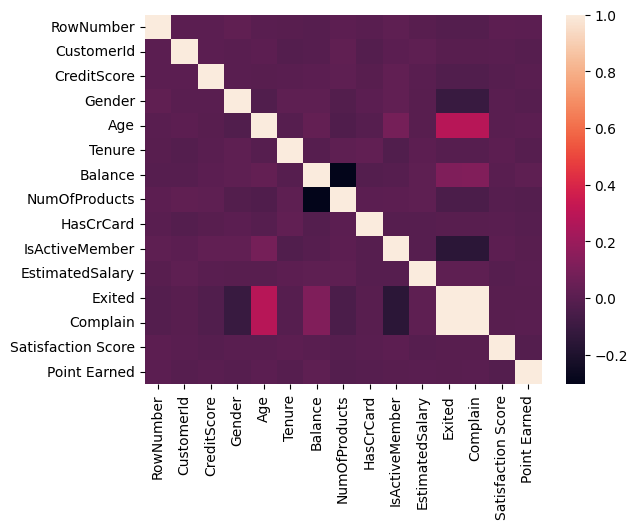

In [366]:
numeric_df = df_clean.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr())

## 4. Desbalanceo de Clases

###Pregunta teórica:

* ¿Que es el desbalanceo de clases y por que es un problema al entrenar un modelo de clasificacion? ¿Que
tecnicas utilizarıas para abordar este problema, como SMOTE?

####Respuesta:

* El desbalanceo de clases ocurre cuando en un conjunto de datos, una clase (mayoritaria) tiene muchos más ejemplos que otra clase (minoritaria). Esto puede ser un problema al entrenar un modelo de clasificación porque puede llevar al modelo a enfocarse solo en la clase mayoritaria, ignorando la clase minoritaria. Esto produce métricas engañosas, como una alta exactitud en la clase mayoritaria pero bajo desempeño en la predicción de la clase minoritaria afectando la utilidad del modelo en la toma de decisiones.
Para abordar este problema se pueden usar técnicas como SMOTE, que genera ejemplos sintéticos de la clase minoritaria (oversampling), o undersampling, que reduce la cantidad de datos de la clase mayoritaria.


###Pregunta práctica. Comparacion de Modelos de Clasificacion

Usando la tabla de datos, entrena dos modelos de clasificaci´on: Regresi´on Log´ıstica y ´Arbol de
Decisi´on para predecir la salida de clientes (Exited). Compara los modelos utilizando la m´etrica ROC
AUC. Para esto, sigue los pasos:
* Preprocesa los datos (conversi´on de variables categ´oricas, manejo de valores faltantes).
* Divide los datos en un conjunto de entrenamiento y uno de prueba.
* Entrena los modelos de Regresi´on Log´ıstica y ´Arbol de Decisi´on.
* Calcula la m´etrica ROC AUC para cada modelo y comp´aralos.
* Si detectas desbalanceo de clases, aplica SMOTE para equilibrar el dataset antes de entrenar los
modelos.

Discute los resultados obtenidos. ¿Cu´al modelo es el m´as adecuado para este problema? ¿Por qu´e?

Ambos modelos son adecuados para este problema ya que el accuracy en ambos es de 100% mostrando un buen rendimiento para predecir

In [367]:
df_clean = df_clean.drop(['Surname','CustomerId','RowNumber'], axis=1)

In [368]:
x = df_clean[['Age', 'IsActiveMember', 'Satisfaction Score', 'Complain', 'NumOfProducts']]
y = df_clean['Exited']

In [369]:
# Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Regresión Logística
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      0.99      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



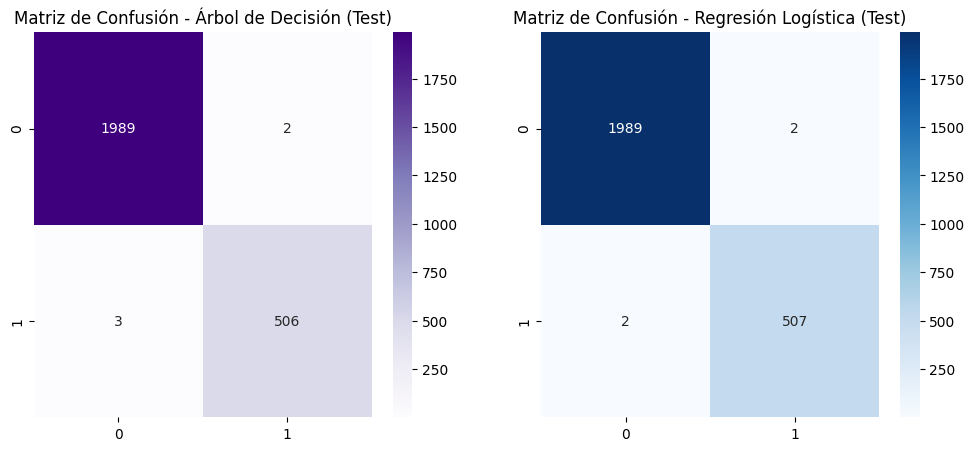

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942



In [370]:
## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

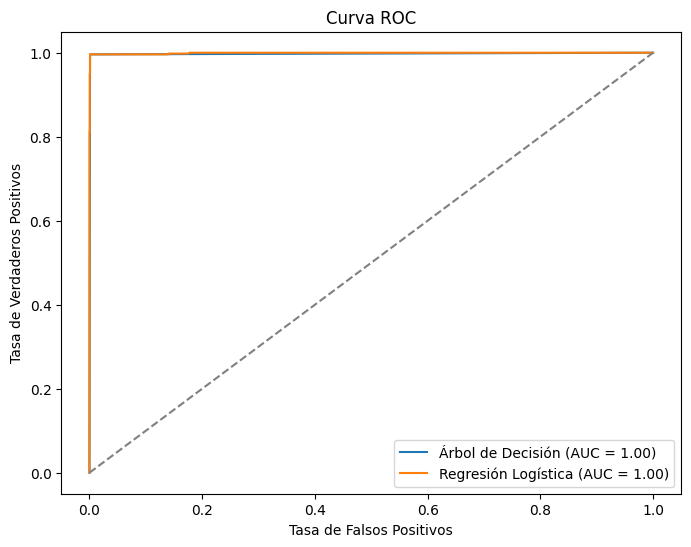

In [385]:
# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

In [372]:
df_clean['Exited'].value_counts()

,count
Exited,
0,7962
1,2038


In [373]:
df_clean['Exited'].value_counts(normalize=True)

,proportion
Exited,
0,0.7962
1,0.2038


In [374]:
!pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [375]:
x_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, stratify=y, random_state=42)

print("Dimensiones del conjunto de entrenamiento:", x_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

print("Distribución de clases en entrenamiento (proporciones):")
print(y_train.value_counts(normalize=True))

Dimensiones del conjunto de entrenamiento: (7500, 5)
Dimensiones del conjunto de prueba: (2500, 5)
Distribución de clases en entrenamiento (proporciones):
Exited
0    0.796133
1    0.203867
Name: proportion, dtype: float64


In [376]:
from imblearn.over_sampling import SMOTE
if y_train.value_counts(normalize=True).max() > 0.60:
    print("Aplicando SMOTE para balancear el conjunto de entrenamiento...")
    smote = SMOTE(random_state=42)
    X_train, y_train = smote.fit_resample(x_train, y_train)
    print("Nueva distribución de clases:")
    print(pd.Series(y_train).value_counts(normalize=True))

Aplicando SMOTE para balancear el conjunto de entrenamiento...
Nueva distribución de clases:
Exited
0    0.5
1    0.5
Name: proportion, dtype: float64


/usr/local/lib/python3.11/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


In [377]:
# Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Regresión Logística
lr_model = LogisticRegression(max_iter=10000, random_state=42)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

Reporte de Clasificación - Árbol de Decisión (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      0.99      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500

Reporte de Clasificación - Regresión Logística (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      1.00      1.00       509

    accuracy                           1.00      2500
   macro avg       1.00      1.00      1.00      2500
weighted avg       1.00      1.00      1.00      2500



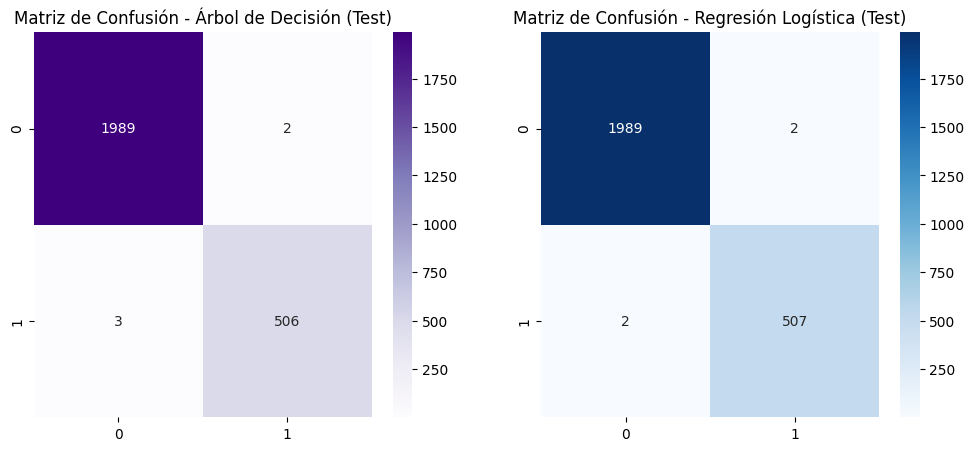

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942

Reporte de Clasificación - Regresión Logística (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942



In [378]:
## Evaluación en el conjunto de prueba
# Predicciones en test
y_pred_dt = dt_model.predict(X_test)
y_pred_lr = lr_model.predict(X_test)

print("Reporte de Clasificación - Árbol de Decisión (Test):")
print(classification_report(y_test, y_pred_dt))

print("Reporte de Clasificación - Regresión Logística (Test):")
print(classification_report(y_test, y_pred_lr))

# Matrices de Confusión
fig, ax = plt.subplots(1, 2, figsize=(12,5))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt='d', ax=ax[0], cmap='Purples')
ax[0].set_title("Matriz de Confusión - Árbol de Decisión (Test)")
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=ax[1], cmap='Blues')
ax[1].set_title("Matriz de Confusión - Regresión Logística (Test)")
plt.show()

## Evaluación en el conjunto de entrenamiento para detectar overfitting
# Use X_train (the resampled data) instead of x_train
y_pred_train_dt = dt_model.predict(X_train)
y_pred_train_lr = lr_model.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_dt))

print("Reporte de Clasificación - Regresión Logística (Train):")
print(classification_report(y_train, y_pred_train_lr))

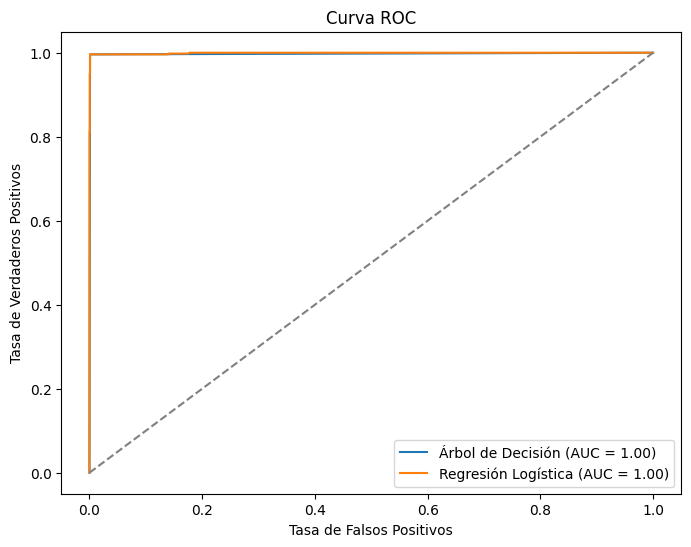

In [379]:
# Obtener probabilidades en test
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

# Calcular ROC y AUC
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
auc_dt = auc(fpr_dt, tpr_dt)
auc_lr = auc(fpr_lr, tpr_lr)

# Graficar ROC
plt.figure(figsize=(8,6))
plt.plot(fpr_dt, tpr_dt, label=f"Árbol de Decisión (AUC = {auc_dt:.2f})")
plt.plot(fpr_lr, tpr_lr, label=f"Regresión Logística (AUC = {auc_lr:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.show()

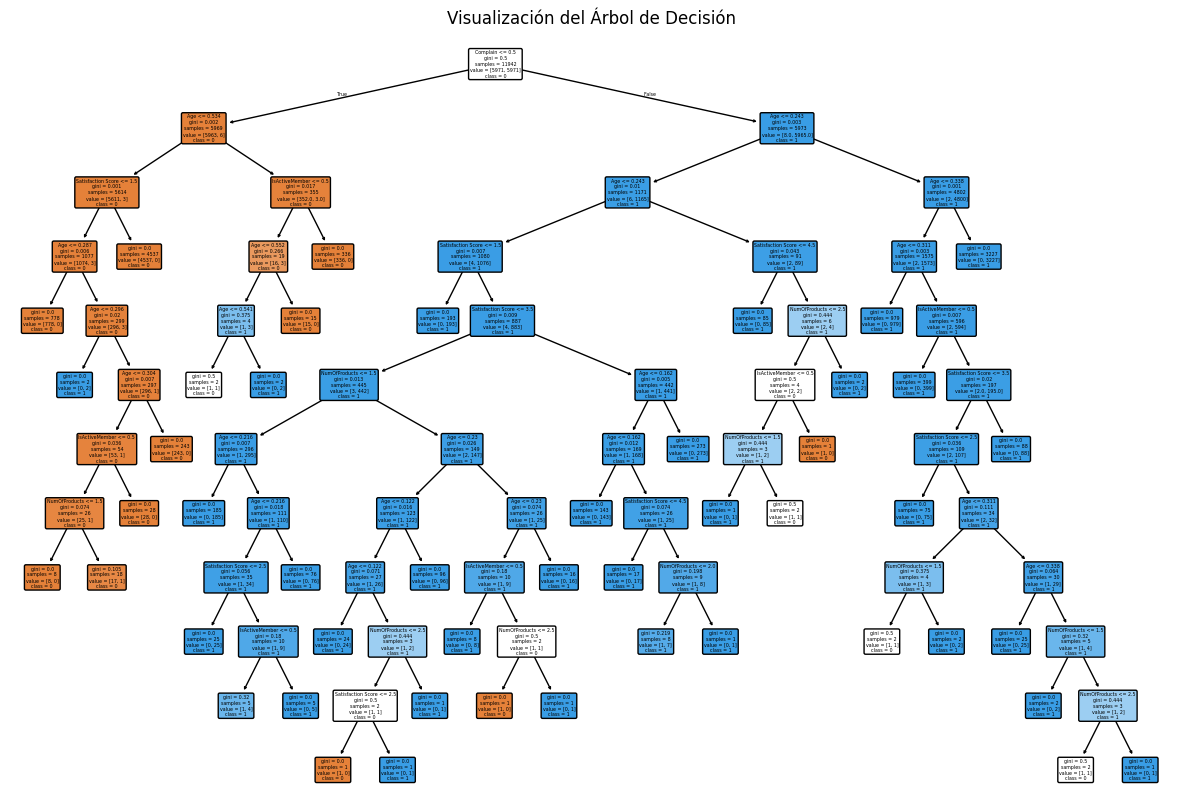

In [380]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
plot_tree(dt_model, feature_names=x.columns, class_names=["0", "1"], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión")
plt.show()

In [381]:
dt_model_pruned = DecisionTreeClassifier(max_depth=5, random_state=42)
dt_model_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [382]:
y_pred_pruned = dt_model_pruned.predict(X_test)
y_pred_train_pruned = dt_model_pruned.predict(X_train)

print("Reporte de Clasificación - Árbol de Decisión (Train):")
print(classification_report(y_train, y_pred_train_pruned))

Reporte de Clasificación - Árbol de Decisión (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5971
           1       1.00      1.00      1.00      5971

    accuracy                           1.00     11942
   macro avg       1.00      1.00      1.00     11942
weighted avg       1.00      1.00      1.00     11942



In [383]:
# Print the classification report
print(classification_report(y_test, y_pred_pruned))

# Print the confusion matrix
print(confusion_matrix(y_test, y_pred_pruned))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1991
           1       1.00      0.99      0.99       509

    accuracy                           1.00      2500
   macro avg       1.00      0.99      1.00      2500
weighted avg       1.00      1.00      1.00      2500

[[1989    2]
 [   5  504]]


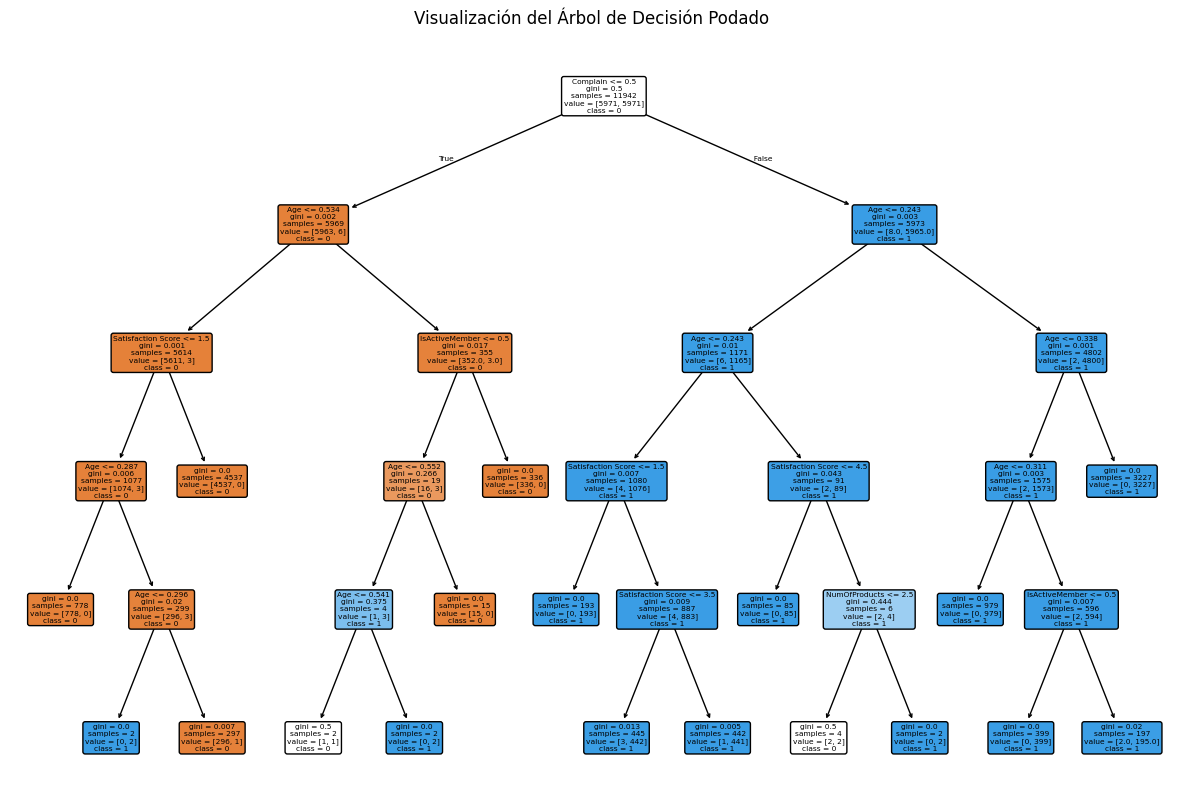

In [384]:
plt.figure(figsize=(15, 10))
plot_tree(dt_model_pruned, feature_names=x.columns, class_names=['0', '1'], filled=True, rounded=True)
plt.title("Visualización del Árbol de Decisión Podado")
plt.show()

## 5. Overfiting

###Pregunta teórica:

* ¿Que es el overfitting y como puedes detectarlo en un modelo de Machine Learning? Explica que medidas
tomarıas para evitar el sobreajuste y mejorar la capacidad de generalizacion de tu modelo.

####Respuesta:

* El overfitting ocurre cuando un modelo aprende demasiado bien los datos de entrenamiento, incluyendo patrones irrelevantes, lo que afecta negativamente su desempeño en datos nuevos. Se puede detectar si el modelo tiene alta precisión en entrenamiento pero baja en prueba, o si las métricas de validación cruzada varían mucho. Para evitarlo y mejorar la generalización, se pueden aplicar técnicas como usar modelos más simples, aumentar los datos o aplicar validación cruzada.



###Preguntas prácticas. Evaluacion del Desempeño del Modelo

Despu´es de entrenar los modelos, eval´ua su desempe˜no usando m´etricas adicionales como precisi´on, recall,
F1 y la matriz de confusi´on. Responde las siguientes preguntas:
* ¿Qu´e modelo tiene el mejor desempe˜no general? Justifica tu respuesta utilizando las m´etricas.
* ¿C´omo impacta el desbalanceo de clases en la m´etrica ROC AUC y en otras m´etricas?
* ¿Qu´e acciones tomar´ıas si el modelo tiene un alto sesgo hacia la clase mayoritaria?

####Respuestas:

*  El modelo de regresión logística mostró un mejor desempeño general que el árbol de decisión, ya que obtuvo métricas más equilibradas, especialmente en F1-score y ROC AUC, lo que indica una mejor capacidad para distinguir entre clases sin sobreajustarse. A diferencia del árbol, la regresión logística mantuvo una buena relación entre precisión y recall después de aplicar SMOTE.
* El desbalanceo de clases afecta negativamente métricas como accuracy, que puede ser engañosamente alta si el modelo solo predice la clase mayoritaria. También reduce la efectividad de métricas como recall y F1-score para la clase minoritaria. En cuanto al ROC AUC, aunque es más robusto, puede verse distorsionado si el modelo no logra diferenciar adecuadamente ambas clases
*  Si el modelo presenta un alto sesgo hacia la clase mayoritaria, se deben aplicar técnicas como SMOTE o ajuste de pesos de clase, utilizar métricas más adecuadas como F1-score, revisar las variables seleccionadas y aplicar validación cruzada estratificada para asegurar que el modelo aprenda correctamente de ambas clases.





###6. Reflexión

Despu´es de completar los ejercicios, reflexiona sobre los siguientes puntos:
* ¿Qu´e desaf´ıos enfrentaste al trabajar con los datos proporcionados?
Uno de los principales desafíos fue identificar y tratar el desbalanceo de clases, que afectaba la calidad de las predicciones. También fue necesario analizar cuidadosamente qué variables realmente aportaban valor al modelo, ya que algunas tenían muy baja correlación con la variable objetivo.
* ¿Qu´e mejorar´ıas en el proceso de preprocesamiento de datos?
Mejoraría la limpieza de los datos y la selección de variables. Por ejemplo, podría eliminar columnas que no aportan al modelo y normalizar los datos numéricos para que todos tengan el mismo rango.
* Si pudieras recolectar m´as datos, ¿qu´e variables adicionales ser´ıan ´utiles para mejorar el modelo de clasificaci´on?
Sería útil tener información más detallada del comportamiento del cliente, como el número de veces que contacta al servicio al cliente, si ha tenido problemas recientes o cuánto tiempo lleva como cliente.
* ¿C´omo asegurar´ıas que el modelo generalice bien y no est´e sobreajustado?
Usaría validación cruzada y probaría con modelos más simples para evitar que el modelo memorice los datos. También compararía los resultados del entrenamiento con los de prueba.
* ¿Qu´e impacto tuvo el desbalanceo de clases en la precisi´on de tu modelo? ¿C´omo se resolvi´o con SMOTE?
El desbalance hizo que el modelo predijera casi siempre la clase mayoritaria, lo que afectaba su capacidad de detectar a los clientes que se iban. Con SMOTE se equilibraron las clases y el modelo pudo aprender mejor sobre la clase minoritaria.
* ¿C´omo detectar´ıas y manejar´ıas el overfitting en un modelo de Machine Learning? ¿Qu´e t´ecnicas implementar´ıas para mejorar la capacidad de generalizaci´on?
Detectaría el overfitting si el modelo tiene muy buen resultado en entrenamiento pero malo en prueba. Para evitarlo, usaría validación cruzada para evaluar la estabilidad del modelo y asegurar que el aprendizaje no esté limitado solo al conjunto de entrenamiento.

